In [ ]:
#Insights on how the various show rooms performs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
from pymongo import MongoClient
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px

In [ ]:
db_name = "Processed_Thrifty_Database"
host = "capstone-cosmos-db.mongo.cosmos.azure.com"
port = 10255
username = "capstone-cosmos-db"
password = "BuYmUjcc9LwFDN2PdVNuUudZTG5ABlxPoZgdIoRlrugcfiF5Rm15REQOJL1dspgH28NeeJI5dOeMCwzqRRrCvg=="
args = "ssl=true&retrywrites=false&ssl_cert_reqs=CERT_NONE"

In [ ]:
connection_uri = f"mongodb://{username}:{password}@{host}:{port}/{db_name}?{args}"
client = MongoClient(connection_uri)
 
db = client[db_name]
collection = db['Customer_Segmentation']

In [ ]:
store_eval_df= pd.DataFrame(list(collection.find()))
store_eval_df

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.628830,11.414804,Mecklenburg-Vorpommern,50.0
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.628830,11.414804,Mecklenburg-Vorpommern,50.0
2,6094edbbe1a88135b12e28ed,1680,2020-12-22 22:58:31,3001,9,27,poor,showroom,customer,3,1,2020,December,23:58:31,23,4,Tuesday,Weekday,No,None,dresses,100,900,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.628830,11.414804,Mecklenburg-Vorpommern,50.0
3,6094edbde1a88135b130125e,1680,2019-08-31 23:53:24,3001,3,18,good,online,website,-1,4,2019,September,01:53:24,1,3,Sunday,Weekend,No,None,dresses,100,300,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.628830,11.414804,Mecklenburg-Vorpommern,50.0
4,6094edbde1a88135b130612f,1680,2019-03-10 19:27:23,3001,1,43,excellent,online,unnamed,-1,5,2019,March,20:27:23,20,1,Sunday,Weekend,No,None,dresses,100,100,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.628830,11.414804,Mecklenburg-Vorpommern,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954007,6094edc2e1a88135b1386702,489,2020-10-20 22:44:22,3021,6,52,good,online,customer,-1,4,2020,October,00:44:22,0,4,Wednesday,Weekday,No,None,cap,45,270,Dr. Ismail Mälzer B.Eng.,F,1987-03-24,Gierschnerallee 2/3\n99354 Wismar,2013-06-08,21,0,0,0,33.0,Wismar,53.890983,11.464793,Mecklenburg-Vorpommern,33.0
954008,6094edc2e1a88135b13938de,489,2020-04-13 03:07:51,3021,5,56,good,online,twitter,-1,4,2020,April,05:07:51,5,2,Monday,Weekday,Yes,Ostermontag,cap,45,225,Dr. Ismail Mälzer B.Eng.,F,1987-03-24,Gierschnerallee 2/3\n99354 Wismar,2013-06-08,21,0,0,0,33.0,Wismar,53.890983,11.464793,Mecklenburg-Vorpommern,33.0
954009,6094edc3e1a88135b139592b,489,2020-10-16 20:30:50,3021,4,75,not that good,online,referral,-1,2,2020,October,22:30:50,22,4,Friday,Weekday,No,None,cap,45,180,Dr. Ismail Mälzer B.Eng.,F,1987-03-24,Gierschnerallee 2/3\n99354 Wismar,2013-06-08,21,0,0,0,33.0,Wismar,53.890983,11.464793,Mecklenburg-Vorpommern,33.0
954010,6094edc3e1a88135b13a290d,489,2020-03-28 06:48:24,3021,10,27,not that good,online,customer,-1,2,2020,March,07:48:24,7,1,Saturday,Weekend,No,None,cap,45,450,Dr. Ismail Mälzer B.Eng.,F,1987-03-24,Gierschnerallee 2/3\n99354 Wismar,2013-06-08,21,0,0,0,33.0,Wismar,53.890983,11.464793,Mecklenburg-Vorpommern,33.0


In [ ]:
bins = [-3,10,18, 45, 55, 75, 85, 120]
labels = ['-3-10','10-17','18-45', '46-55','56-75', '75-85', '86+']
store_eval_df['Age_range'] = pd.cut(store_eval_df['Transaction_Age'], bins, labels = labels)
store_eval_df.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age,Age_range
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55


In [ ]:
bins = [0,4,8,12,16,20,24]
labels = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
store_eval_df['session'] = pd.cut(store_eval_df['Transaction_Hour'], bins, labels=labels)
store_eval_df.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age,Age_range,session
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Early Morning
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Noon


In [ ]:
#customer who purchase via showroom only
showroom_customers=store_eval_df[store_eval_df.Purchased_From == 'showroom']
showroom_customers.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age,Age_range,session
2,6094edbbe1a88135b12e28ed,1680,2020-12-22 22:58:31,3001,9,27,poor,showroom,customer,3,1,2020,December,23:58:31,23,4,Tuesday,Weekday,No,None,dresses,100,900,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Night
5,6094edbee1a88135b1312130,1680,2020-04-22 14:53:22,3001,9,53,poor,showroom,instagram,5,1,2020,April,16:53:22,16,2,Wednesday,Weekday,No,None,dresses,100,900,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Noon


In [ ]:
#customer who purchase via online only
online_customers=store_eval_df[store_eval_df.Purchased_From == 'online']
online_customers.head(2)

,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Town,Latitude,Longitude,State,Transaction_Age,Age_range,session
0,6094edbae1a88135b12d145c,1680,2020-09-28 03:03:24,3001,7,81,good,online,customer,-1,4,2020,September,05:03:24,5,3,Monday,Weekday,No,None,dresses,100,700,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Early Morning
1,6094edbbe1a88135b12dcdaf,1680,2020-06-12 13:51:47,3001,5,78,not that good,online,twitter,-1,2,2020,June,15:51:47,15,2,Friday,Weekday,No,None,dresses,100,500,Herr Jan Geisel B.A.,F,1917-04-25,Lindaugasse 17\n49311 Schwerin,2013-04-28,74,0,0,0,50.0,Schwerin,53.62883,11.414804,Mecklenburg-Vorpommern,50.0,46-55,Noon


In [ ]:
print('Shape: ', store_eval_df.shape)

print('---')
print(store_eval_df.dtypes)

print('---')
print(store_eval_df.describe())

print('---')
print(store_eval_df.isnull().sum())

Shape:  (954012, 40)
---
_id                               object
Customer_Id                        int64
Transaction_Date          datetime64[ns]
Item_Id                            int64
Quantity_Purchased                 int64
Sales_Person_Id                    int64
User_Product_Review               object
Purchased_From                    object
Product_Discovery_Info            object
Showroom_Id                        int64
Customer_Ratings                   int64
Transaction_Year                  object
Transaction_Month                 object
Transaction_Time                  object
Transaction_Hour                   int64
Transaction_Quarter               object
Transaction_Day                   object
Transaction_Day_Type              object
Holiday                           object
Holiday_Name                      object
Item_Name                         object
Item_Price                         int64
Amount_Spent                       int64
Name                            

In [ ]:
unique_user_count = store_eval_df.Customer_Id.unique().shape[0]
print('Unique User Count:', unique_user_count)

Unique User Count: 2240


In [ ]:
unique_user_count = showroom_customers.Showroom_Id.unique().shape[0]
print('Unique User Count:', unique_user_count)

Unique User Count: 21


In [ ]:
#no of customers who make purchase via showroom vs online
No_of_customer_df = store_eval_df.groupby(by=['Purchased_From'], as_index=False)['Customer_Id'].count()
No_of_customer_df

,Purchased_From,Customer_Id
0,online,475906
1,showroom,478106


In [ ]:
##no of customers who purchase from each of the different showroom 
customers=showroom_customers.groupby(['Showroom_Id'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)
customers.sort_values('Customer_Id', ascending=False)

,Showroom_Id,Customer_Id
17,17,23055
15,15,22951
3,3,22897
4,4,22861
6,6,22834
0,0,22809
9,9,22803
13,13,22802
7,7,22797
18,18,22797


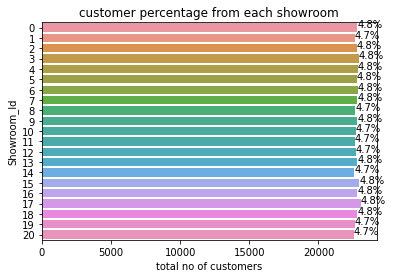

In [ ]:
df = pd.DataFrame(np.array([['a'], ['a'], ['b']]), columns=['Showroom_Id'])
ax = sns.countplot(y="Showroom_Id", data=showroom_customers)
plt.title('customer percentage from each showroom')
plt.xlabel('total no of customers')

total = len(showroom_customers['Showroom_Id'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.05
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [ ]:
#number of customers each showroom had for the 3 years (2018,2019,2020)
x=showroom_customers.groupby(['Showroom_Id','Transaction_Month','Transaction_Year'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)
x

,Showroom_Id,Transaction_Month,Transaction_Year,Customer_Id
382,10,August,2019,711
204,5,September,2018,706
252,7,January,2018,705
373,10,May,2019,705
675,18,October,2018,702
...,...,...,...,...
291,8,February,2018,534
148,4,February,2019,533
4,0,February,2019,532
327,9,February,2018,530


In [ ]:
x.to_csv('showroomcstmersGeeks.csv')

In [ ]:
##no of customers who purchase from online 
online_customers.groupby(['Showroom_Id'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)

,Showroom_Id,Customer_Id
0,-1,475906


In [ ]:
##number of online customers  for the 3 years (2018,2019,2020)
online_customers.groupby(['Showroom_Id','Transaction_Year'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)

,Showroom_Id,Transaction_Year,Customer_Id
2,-1,2020,159119
0,-1,2018,158748
1,-1,2019,158039


In [ ]:
#revenue generated on each showroom

In [ ]:
#total revenue generated from online vs showroom
store_eval_df.groupby(['Purchased_From'])['Amount_Spent'].sum().reset_index()

,Purchased_From,Amount_Spent
0,online,315395370
1,showroom,316727380


In [ ]:
#revenue made from  each showroom
revenue=showroom_customers.groupby(['Showroom_Id'])['Amount_Spent'].sum().reset_index()
revenue.sort_values('Amount_Spent', ascending=False)

,Showroom_Id,Amount_Spent
17,17,15396910
18,18,15278775
6,6,15209635
16,16,15154450
15,15,15138040
12,12,15115115
5,5,15105625
13,13,15105435
7,7,15098890
9,9,15084530


In [ ]:
revenue=showroom_customers.groupby(['Showroom_Id'])['Amount_Spent'].sum().reset_index()
#plot
fig = px.pie(revenue, values='Amount_Spent', names='Showroom_Id', title='showroom perfomance',hole=.3)
fig.show()

In [ ]:
#how much money did each showroom make for each year(2018,2019,2020)
yearly_rev=showroom_customers.groupby(['Showroom_Id','Transaction_Month','Transaction_Year'])['Amount_Spent'].sum().reset_index()
yearly_rev.sort_values('Amount_Spent', ascending=False)


,Showroom_Id,Transaction_Month,Transaction_Year,Amount_Spent
531,14,October,2018,495830
224,6,March,2020,491640
424,11,October,2019,487830
607,16,November,2019,482040
696,19,May,2018,480395
...,...,...,...,...
148,4,February,2019,347805
47,1,April,2020,345745
112,3,February,2019,345130
147,4,February,2018,340775


In [ ]:
yearly_rev.to_csv('showroomcstmersyearlyGeeks.csv')

In [ ]:
##Amount made from online
online_customers.groupby(['Showroom_Id'])['Amount_Spent'].sum().reset_index()

,Showroom_Id,Amount_Spent
0,-1,315395370


In [ ]:
##how much money made from online for each years(2018,2019,2020)
online_customers.groupby(['Showroom_Id','Transaction_Year'])['Amount_Spent'].sum().reset_index()

,Showroom_Id,Transaction_Year,Amount_Spent
0,-1,2018,105573745
1,-1,2019,104469235
2,-1,2020,105352390


Added some categories to group months and day

In [ ]:
# Create categories to group the months
cats = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cat_dtype = pd.api.types.CategoricalDtype(
    categories=cats, ordered=True)
showroom_customers['Transaction_Month'] = showroom_customers['Transaction_Month'].astype(cat_dtype)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Create categories to group the days
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_dtype = pd.api.types.CategoricalDtype(
    categories=cats, ordered=True)
showroom_customers['Transaction_Day'] = showroom_customers['Transaction_Day'].astype(cat_dtype)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
trend_df_year=showroom_customers.groupby(['Transaction_Year','Transaction_Month'])['Amount_Spent'].sum().reset_index()
trend_df_year

,Transaction_Year,Transaction_Month,Amount_Spent
0,2018,January,8933945
1,2018,February,7814110
2,2018,March,8996195
3,2018,April,8690885
4,2018,May,8858865
5,2018,June,8638485
6,2018,July,9097650
7,2018,August,8995950
8,2018,September,8712700
9,2018,October,9117205


In [ ]:
trend_df_year.to_csv('yearly.csv')

Sorted values to show clear difference between top and bottom values

In [ ]:
#2020
trend=trend_df_year[trend_df_year.Transaction_Year == '2020']
# This shows the months of the top and bottom 5 amount spent for 2020 per showroom
trend.sort_values('Amount_Spent', ascending=False)

# This shows the amount spent per showroom in 2020 by month
#trend.sort_values(['Transaction_Month', 'Amount_Spent'])

,Transaction_Year,Transaction_Month,Amount_Spent
30,2020,July,9096210
31,2020,August,9063415
24,2020,January,9023705
33,2020,October,8982220
28,2020,May,8970130
26,2020,March,8906900
34,2020,November,8797920
29,2020,June,8737425
35,2020,December,8656355
32,2020,September,8638715


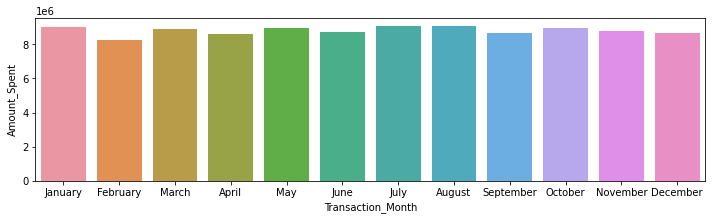

In [ ]:
#monthly revenue generation for 2020
plt.figure(figsize=(12, 3))
trend=trend_df_year[trend_df_year.Transaction_Year == '2020']
trend.sort_values('Amount_Spent', ascending=False)
sns.barplot(x="Transaction_Month", y="Amount_Spent", data=trend)
plt.show()

In [ ]:
#2019
trend=trend_df_year[trend_df_year.Transaction_Year == '2019']
# This shows the months of the top and bottom 5 amount spent for 2019 per showroom
trend.sort_values('Amount_Spent', ascending=False)

# This shows the amount spent per showroom in 2019 by month
#trend.sort_values(['Transaction_Month', 'Amount_Spent'])

,Transaction_Year,Transaction_Month,Amount_Spent
21,2019,October,9047960
23,2019,December,9038440
18,2019,July,8985090
19,2019,August,8983265
12,2019,January,8948300
14,2019,March,8923270
16,2019,May,8824990
15,2019,April,8637680
17,2019,June,8636880
22,2019,November,8603930


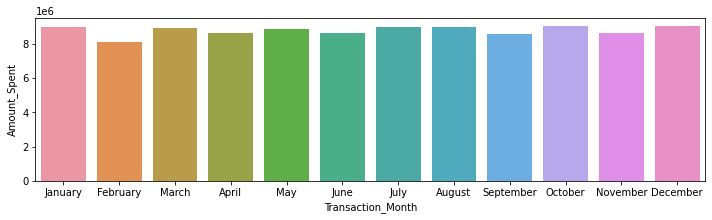

In [ ]:
##monthly revenue generation for 2019
plt.figure(figsize=(12, 3))
trend=trend_df_year[trend_df_year.Transaction_Year == '2019']
trend.sort_values('Amount_Spent', ascending=False)
sns.barplot(x="Transaction_Month", y="Amount_Spent", data=trend)
plt.show()

In [ ]:
#2018
trend=trend_df_year[trend_df_year.Transaction_Year == '2018']
# This shows the months of the top and bottom 5 amount spent for 2018 per showroom
trend.sort_values('Amount_Spent', ascending=False)

# This shows the amount spent per showroom in 2018 by month
#trend.sort_values(['Transaction_Month', 'Amount_Spent'])

,Transaction_Year,Transaction_Month,Amount_Spent
9,2018,October,9117205
6,2018,July,9097650
10,2018,November,9011225
2,2018,March,8996195
7,2018,August,8995950
0,2018,January,8933945
4,2018,May,8858865
11,2018,December,8857185
8,2018,September,8712700
3,2018,April,8690885


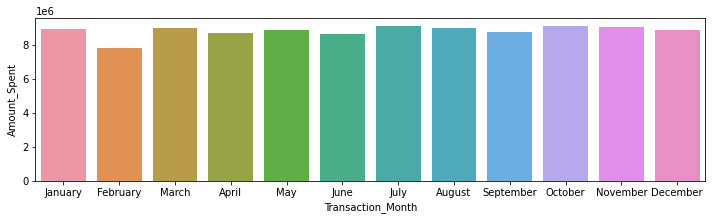

In [ ]:
###monthly revenue generation for 2019
plt.figure(figsize=(12, 3))
trend=trend_df_year[trend_df_year.Transaction_Year == '2018']
trend.sort_values('Amount_Spent', ascending=False)
sns.barplot(x="Transaction_Month", y="Amount_Spent", data=trend)
plt.show()

In [ ]:
# How much money was made per year for each showroom
year_anaysis = showroom_customers[['Showroom_Id', 'Transaction_Year', 'Amount_Spent']].groupby(['Showroom_Id', 'Transaction_Year']).sum().sort_values(['Showroom_Id', 'Transaction_Year'])
year_anaysis.head(60)

Amount_Spent
Showroom_Id Transaction_Year              
0           2018                   4997215
            2019                   4992955
            2020                   4942890
1           2018                   4936055
            2019                   5011805
            2020                   5012905
2           2018                   5017520
            2019                   5069595
            2020                   4963325
3           2018                   5103630
            2019                   4909675
            2020                   5024710
4           2018                   5070335
            2019                   4960345
            2020                   4939640
5           2018                   5136255
            2019                   4910555
            2020                   5058815
6           2018                   5006165
            2019                   5068465
            2020                   5135005
7           2018                   5041260
            2019                   4904195
            2020                   5153435
8           2018                   4943810
            2019                   5039420
            2020                   5011275
9           2018                   4944640
            2019                   5222180
            2020                   4917710
10          2018                   4950285
            2019                   5112930
            2020                   4894080
11          2018                   4966475
            2019                   5089875
            2020                   5010865
12          2018                   4955810
            2019                   5002975
            2020                   5156330
13          2018                   5047430
            2019                   5038045
            2020                   5019960
14          2018                   5164865
            2019                   4905955
            2020                   4927070
15          2018                   5074720
            2019                   5018985
            2020                   5044335
16          2018                   4973645
            2019                   5024710
            2020                   5156095
17          2018                   5138520
            2019                   5151945
            2020                   5106445
18          2018                   5150355
            2019                   5028005
            2020                   5100415
19          2018                   5070940
            2019                   4984340
            2020                   5024170

In [ ]:
#year with highest revenue depending How much money was made per year for each showroom #what was more
year_anaysis.sort_values('Amount_Spent', ascending=False)


,,Amount_Spent
Showroom_Id,Transaction_Year,
9,2019,5222180
14,2018,5164865
12,2020,5156330
16,2020,5156095
7,2020,5153435
...,...,...
3,2019,4909675
14,2019,4905955
7,2019,4904195


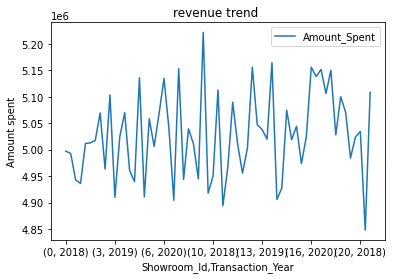

In [ ]:
year_anaysis = showroom_customers[['Showroom_Id', 'Transaction_Year', 'Amount_Spent']].groupby(['Showroom_Id', 'Transaction_Year']).sum().plot(kind = 'line')
plt.title('revenue trend ')
plt.ylabel('Amount spent')
plt.show()

In [ ]:
#which day of the week does each showroom has many customers
day_eval=showroom_customers.groupby(['Showroom_Id','Transaction_Day'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)
day_eval

,Showroom_Id,Transaction_Day,Customer_Id
29,4,Tuesday,3405
108,15,Thursday,3352
43,6,Tuesday,3351
16,2,Wednesday,3351
69,9,Sunday,3349
...,...,...,...
31,4,Thursday,3152
6,0,Sunday,3146
139,19,Sunday,3137
144,20,Friday,3133


In [ ]:
#which day of the week does has many customers making purchase online
day_eval_online=online_customers.groupby(['Showroom_Id','Transaction_Day'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)
#top 5 depending which day of the week does online has many customers
day_eval_online.sort_values('Customer_Id', ascending=False)

,Showroom_Id,Transaction_Day,Customer_Id
5,-1,Tuesday,68438
1,-1,Monday,68305
6,-1,Wednesday,68173
0,-1,Friday,68033
2,-1,Saturday,67931
3,-1,Sunday,67552
4,-1,Thursday,67474


In [ ]:
# Are there specific days during the week that more revenue is generated for each showroom
day_analysis = showroom_customers[['Showroom_Id', 'Transaction_Day', 'Amount_Spent']].groupby(['Showroom_Id', 'Transaction_Day']).sum().sort_values(['Showroom_Id', 'Transaction_Day'])
day_analysis

Amount_Spent
Showroom_Id Transaction_Day              
0           Monday                2153690
            Tuesday               2086375
            Wednesday             2095475
            Thursday              2174760
            Friday                2193455
...                                   ...
20          Wednesday             2149995
            Thursday              2110985
            Friday                2079120
            Saturday              2109940
            Sunday                2184270

[147 rows x 1 columns]

In [ ]:
# When do the different showrooms generate more revenue between weekday and weekends
showroom_customers[['Showroom_Id', 'Transaction_Day_Type', 'Amount_Spent']].groupby(['Showroom_Id', 'Transaction_Day_Type']).sum().sort_values(['Showroom_Id', 'Transaction_Day_Type'])


Amount_Spent
Showroom_Id Transaction_Day_Type              
0           Weekday                   10703755
            Weekend                    4229305
1           Weekday                   10596130
            Weekend                    4364635
2           Weekday                   10799015
            Weekend                    4251425
3           Weekday                   10717085
            Weekend                    4320930
4           Weekday                   10764555
            Weekend                    4205765
5           Weekday                   10766005
            Weekend                    4339620
6           Weekday                   10906255
            Weekend                    4303380
7           Weekday                   10843720
            Weekend                    4255170
8           Weekday                   10731405
            Weekend                    4263100
9           Weekday                   10772970
            Weekend                    4311560
10          Weekday                   10738380
            Weekend                    4218915
11          Weekday                   10648050
            Weekend                    4419165
12          Weekday                   10813810
            Weekend                    4301305
13          Weekday                   10749500
            Weekend                    4355935
14          Weekday                   10750520
            Weekend                    4247370
15          Weekday                   10946960
            Weekend                    4191080
16          Weekday                   10766980
            Weekend                    4387470
17          Weekday                   11028910
            Weekend                    4368000
18          Weekday                   10938240
            Weekend                    4340535
19          Weekday                   10920290
            Weekend                    4159160
20          Weekday                   10696810
            Weekend                    4294210

In [ ]:
session=showroom_customers[['Showroom_Id', 'session', 'Amount_Spent']].groupby(['Showroom_Id', 'session']).sum().sort_values(['Showroom_Id','session'])
session


Amount_Spent
Showroom_Id session                    
0           Late Night          2448565
            Early Morning       2510885
            Morning             2530735
            Noon                2517940
            Eve                 2462215
...                                 ...
20          Early Morning       2517100
            Morning             2558855
            Noon                2463655
            Eve                 2448505
            Night               1894385

[126 rows x 1 columns]

In [ ]:
session.sort_values('Amount_Spent', ascending=False)

,,Amount_Spent
Showroom_Id,session,
16,Morning,2632695
15,Noon,2630365
17,Morning,2617995
2,Late Night,2606385
18,Morning,2604710
...,...,...
3,Night,1861545
11,Night,1859680
10,Night,1859670


In [ ]:
#PRODUCTS

In [ ]:
#Number of customer who purchased the different items from the different showroom
showroom_customers[['Showroom_Id', 'Item_Name', 'Customer_Id']].groupby(['Showroom_Id', 'Item_Name']).count().sort_values(['Showroom_Id','Item_Name'])

Customer_Id
Showroom_Id Item_Name             
0           Hoodies           1099
            bags              1102
            bathrobe          1082
            blazer            1053
            blouse            1110
...                            ...
20          shorts            1034
            sneaker           1118
            socks             1111
            suits             1125
            swim wear         1032

[441 rows x 1 columns]

In [ ]:
#quantity of items purchased from each showroom
items=showroom_customers[['Showroom_Id', 'Item_Name', 'Quantity_Purchased']].groupby(['Showroom_Id', 'Item_Name']).sum().sort_values(['Showroom_Id','Item_Name'])

In [ ]:
items.sort_values('Quantity_Purchased', ascending=False)

Quantity_Purchased
Showroom_Id Item_Name                    
17          suits                    6484
18          shorts                   6462
9           pamajas                  6422
10          jean                     6414
            dresses                  6378
...                                   ...
            pamajas                  5460
6           cardigan                 5456
20          bags                     5446
12          swim wear                5438
13          socks                    5323

[441 rows x 1 columns]

In [ ]:
#Revenue generated from the different products
showroom_customers[['Showroom_Id', 'Item_Name', 'Amount_Spent']].groupby(['Showroom_Id', 'Item_Name']).sum().sort_values('Amount_Spent', ascending=False)

,,Amount_Spent
Showroom_Id,Item_Name,
17,suits,1945200
11,suits,1878000
20,suits,1866600
15,suits,1832700
12,suits,1821000
...,...,...
4,sandals,87090
18,sandals,86895
12,sandals,86850


In [ ]:
#GEOGRAPHIC

In [ ]:
#data distribution by town
showroom_customers.groupby('Town').count().reset_index().sort_values('Customer_Id', ascending = False).head()

,Town,_id,Customer_Id,Transaction_Date,Item_Id,Quantity_Purchased,Sales_Person_Id,User_Product_Review,Purchased_From,Product_Discovery_Info,Showroom_Id,Customer_Ratings,Transaction_Year,Transaction_Month,Transaction_Time,Transaction_Hour,Transaction_Quarter,Transaction_Day,Transaction_Day_Type,Holiday,Holiday_Name,Item_Name,Item_Price,Amount_Spent,Name,Gender,Birthdate,Address,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Current_Age,Latitude,Longitude,State,Transaction_Age,Age_range,session
112,Genthin,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,80,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3364,3201
22,Bayreuth,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,72,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3203,3091
78,Eichstätt,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,61,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,2623
271,Pinneberg,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,62,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2592,2470
151,Harz,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,75,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2591,2471


In [ ]:

#town where the different customers who purchase from the different showrooms
showroom_customers[['Showroom_Id', 'Town', 'Customer_Id']].groupby(['Showroom_Id', 'Town']).count().sort_values(['Showroom_Id','Town'])

Customer_Id
Showroom_Id Town                     
0           Aachen                124
            Ahaus                  61
            Altentreptow           32
            Altötting              64
            Amberg                 10
...                               ...
20          Wusterhausen           25
            Zerbst                 54
            Zeulenroda             81
            Zossen                 42
            Zschopau               80

[8190 rows x 1 columns]

In [ ]:
#revenue  made from the different towns
location=showroom_customers[['Showroom_Id', 'Town', 'Amount_Spent']].groupby(['Showroom_Id', 'Town']).sum().sort_values(['Showroom_Id','Town'])
location

Amount_Spent
Showroom_Id Town                      
0           Aachen               74120
            Ahaus                48090
            Altentreptow         17575
            Altötting            43350
            Amberg                4160
...                                ...
20          Wusterhausen         18300
            Zerbst               37015
            Zeulenroda           59735
            Zossen               21035
            Zschopau             54035

[8190 rows x 1 columns]

In [ ]:
location.sort_values('Amount_Spent', ascending=False)

,,Amount_Spent
Showroom_Id,Town,
5,Bayreuth,124840
11,Bayreuth,121860
12,Genthin,121490
17,Genthin,120125
2,Genthin,118505
...,...,...
0,Kronach,1980
5,Soest,1765
4,Worbis,1580


In [ ]:
#GENDER


More sorting for clear difference

In [ ]:
#amount spent per each gender on the different showrooms
gender=showroom_customers[['Showroom_Id', 'Gender', 'Amount_Spent']].groupby(['Showroom_Id', 'Gender']).sum().sort_values(['Showroom_Id','Gender'])
gender

Amount_Spent
Showroom_Id Gender              
0           F            7456980
            M            7476080
1           F            7352745
            M            7608020
2           F            7510805
            M            7539635
3           F            7512660
            M            7525355
4           F            7465880
            M            7504440
5           F            7631560
            M            7474065
6           F            7658350
            M            7551285
7           F            7508600
            M            7590290
8           F            7451490
            M            7543015
9           F            7510920
            M            7573610
10          F            7428370
            M            7528925
11          F            7513840
            M            7553375
12          F            7546250
            M            7568865
13          F            7610625
            M            7494810
14          F            7451520
            M            7546370
15          F            7518275
            M            7619765
16          F            7519230
            M            7635220
17          F            7690125
            M            7706785
18          F            7670040
            M            7608735
19          F            7544345
            M            7535105
20          F            7474835
            M            7516185

In [ ]:
top=gender.sort_values('Amount_Spent', ascending=False)
top.head(5)

Amount_Spent
Showroom_Id Gender              
17          M            7706785
            F            7690125
18          F            7670040
6           F            7658350
16          M            7635220

In [ ]:
##Product most popular to the two genders
showroom_customers.groupby(['Item_Name','Gender'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)

,Item_Name,Gender,Customer_Id
20,gym gear,F,11564
39,suits,M,11551
9,blouse,M,11540
23,jean,M,11523
33,shorts,M,11498
17,coat,M,11485
31,shirt,M,11480
41,swim wear,M,11471
8,blouse,F,11469
24,pamajas,F,11462


In [ ]:
#AGE

In [ ]:
#no of customers within the different age ranges
showroom_customers[['Showroom_Id', 'Age_range', 'Customer_Id']].groupby(['Showroom_Id', 'Age_range']).count().sort_values('Customer_Id', ascending=False)

,,Customer_Id
Showroom_Id,Age_range,
3,46-55,5626
7,46-55,5601
14,46-55,5595
15,46-55,5586
8,46-55,5584
...,...,...
15,10-17,1532
1,10-17,1525
0,10-17,1519


In [ ]:
#amount spent by customers of different age ranges
showroom_customers[['Showroom_Id', 'Age_range', 'Amount_Spent']].groupby(['Showroom_Id', 'Age_range']).sum().sort_values('Amount_Spent', ascending=False)

,,Amount_Spent
Showroom_Id,Age_range,
14,46-55,3752195
18,46-55,3737040
15,46-55,3725325
7,46-55,3718830
17,46-55,3714165
...,...,...
19,10-17,1001845
14,10-17,999855
9,10-17,994750


In [ ]:
showroom_customers[['Showroom_Id', 'Age_range', 'Amount_Spent']].groupby(['Showroom_Id', 'Age_range']).sum().sort_values('Amount_Spent', ascending=False)

,,Amount_Spent
Showroom_Id,Age_range,
14,46-55,3752195
18,46-55,3737040
15,46-55,3725325
7,46-55,3718830
17,46-55,3714165
...,...,...
19,10-17,1001845
14,10-17,999855
9,10-17,994750


In [ ]:
##Product most popular to the age
showroom_customers.groupby(['Item_Name','Age_range'])['Customer_Id'].aggregate('count').reset_index().sort_values('Customer_Id', ascending=False)

,Item_Name,Age_range,Customer_Id
10,bags,46-55,5689
108,shirt,46-55,5625
80,jean,46-55,5605
101,sandals,46-55,5603
38,boots,46-55,5600
...,...,...,...
92,rubbers,10-17,1535
15,bathrobe,10-17,1531
8,bags,10-17,1509
127,socks,10-17,1494


In [ ]:
#product review on the different stores
reviews = showroom_customers.groupby(by=['Showroom_Id','User_Product_Review'], as_index=False)['Customer_Id'].count()
reviews

,Showroom_Id,User_Product_Review,Customer_Id
0,0,excellent,5758
1,0,good,5614
2,0,not that good,5612
3,0,poor,5825
4,1,excellent,5773
...,...,...,...
79,19,poor,5581
80,20,excellent,5581
81,20,good,5678
82,20,not that good,5621


In [ ]:
#Revenue generated for the 3 years

In [ ]:

 store_eval_df.info()

IndentationError: ignored

In [ ]:
#yearly Revenue generatiom
yeary_revenue=store_eval_df.groupby(['Transaction_Year'])['Amount_Spent'].sum().reset_index()
yeary_revenue.sort_values('Amount_Spent', ascending=False)
#plot
fig = px.pie(yeary_revenue, values='Amount_Spent', names='Transaction_Year', title='yearly revenue generation',hole=.3)
fig.show()

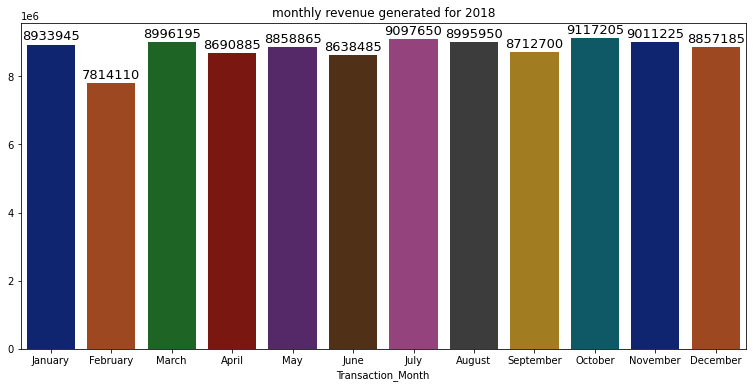

In [ ]:
#monthly revenu generated from 2018
x=showroom_customers.groupby(['Transaction_Year','Transaction_Month'])['Amount_Spent'].sum().reset_index()
trend_x=x[x.Transaction_Year == '2018']
#plot
plt.figure(figsize=(13, 6))
ax = sns.barplot(x = 'Transaction_Month' , y = 'Amount_Spent' , data = trend_x ,palette= 'dark') #plotting bar graph
plt.title("monthly revenue generated for 2018")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 8),
                 textcoords='offset points')

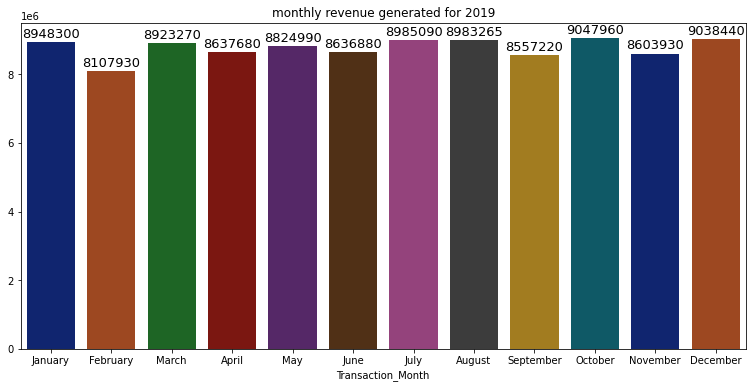

In [ ]:
##monthly revenu generated from 2019
x=showroom_customers.groupby(['Transaction_Year','Transaction_Month'])['Amount_Spent'].sum().reset_index()
trend_x=x[x.Transaction_Year == '2019']
#plot
plt.figure(figsize=(13, 6))
ax = sns.barplot(x = 'Transaction_Month' , y = 'Amount_Spent' , data = trend_x ,palette= 'dark') #plotting bar graph
plt.title("monthly revenue generated for 2019")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 8),
                 textcoords='offset points')

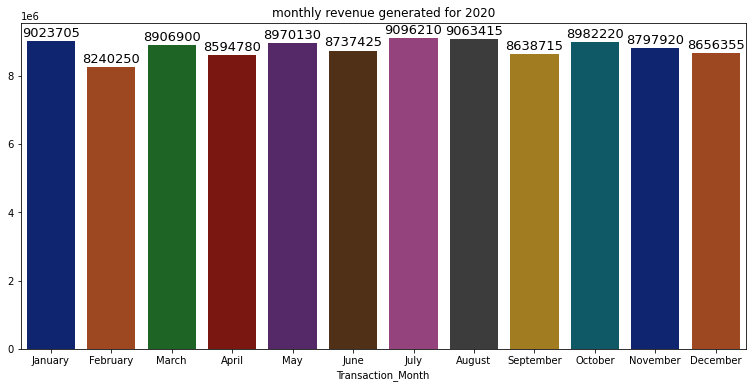

In [ ]:
#monthly revenu generated from 2020
x=showroom_customers.groupby(['Transaction_Year','Transaction_Month'])['Amount_Spent'].sum().reset_index()
trend_x=x[x.Transaction_Year == '2020']
#plot
plt.figure(figsize=(13, 6))
ax = sns.barplot(x = 'Transaction_Month' , y = 'Amount_Spent' , data = trend_x ,palette= 'dark') #plotting bar graph
plt.title("monthly revenue generated for 2020")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 8),
                 textcoords='offset points')